# Deaths by Region

**Data Cleaning, Sarah Scholz**

In [1]:
#import relevant Python packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read in dataset
df = pd.read_csv("data\Deaths_Region_2007-2020.csv")

## Explore Dataset

Using the Python library Pandas, explore the dataset  to determine it's shape and areas that need attention.

In [3]:
df.head(5)

,Statistic,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
0,Deaths Occurring,2007,ROI Total,Both sexes,Under 1 year,Number,230.0
1,Deaths Occurring,2007,ROI Total,Both sexes,1 - 4 years,Number,54.0
2,Deaths Occurring,2007,ROI Total,Both sexes,5 - 9 years,Number,17.0
3,Deaths Occurring,2007,ROI Total,Both sexes,10 - 14 years,Number,50.0
4,Deaths Occurring,2007,ROI Total,Both sexes,15 - 19 years,Number,149.0


In [4]:
df.tail(5) 

,Statistic,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
123475,Deaths Occurring,2020,Outside the ROI Total,Female,70 - 74 years,Number,NaN
123476,Deaths Occurring,2020,Outside the ROI Total,Female,75 - 79 years,Number,NaN
123477,Deaths Occurring,2020,Outside the ROI Total,Female,80 - 84 years,Number,NaN
123478,Deaths Occurring,2020,Outside the ROI Total,Female,85 years and over,Number,NaN
123479,Deaths Occurring,2020,Outside the ROI Total,Female,All ages,Number,NaN


In [5]:
df.dtypes

Statistic             object
Year                   int64
Area of Residence     object
Sex                   object
Age at Death          object
UNIT                  object
VALUE                float64
dtype: object

In [6]:
df.nunique()

Statistic               1
Year                   14
Area of Residence     147
Sex                     3
Age at Death           20
UNIT                    1
VALUE                1661
dtype: int64

Columns Statistic and Unit are not needed for analysis. They have the same value for all rows and thus unnecessarily clutter the dataframe. 

In [7]:
df = df.drop(["UNIT", "Statistic"], axis=1)
df.head(5)

,Year,Area of Residence,Sex,Age at Death,VALUE
0,2007,ROI Total,Both sexes,Under 1 year,230.0
1,2007,ROI Total,Both sexes,1 - 4 years,54.0
2,2007,ROI Total,Both sexes,5 - 9 years,17.0
3,2007,ROI Total,Both sexes,10 - 14 years,50.0
4,2007,ROI Total,Both sexes,15 - 19 years,149.0


In [8]:
df = df.rename(columns={"Area of Residence": "Area_of_Residence", "Age at Death": "Age_at_Death"})
df.head(5) #rename the columns 

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
0,2007,ROI Total,Both sexes,Under 1 year,230.0
1,2007,ROI Total,Both sexes,1 - 4 years,54.0
2,2007,ROI Total,Both sexes,5 - 9 years,17.0
3,2007,ROI Total,Both sexes,10 - 14 years,50.0
4,2007,ROI Total,Both sexes,15 - 19 years,149.0


In [9]:
# nearly half of the value column has missing values
x = str(123480-71149)
print('There are', x, 'missing values in the dataset')
df.count() 

There are 52331 missing values in the dataset


Year                 123480
Area_of_Residence    123480
Sex                  123480
Age_at_Death         123480
VALUE                 71149
dtype: int64

In [10]:
df['Age_at_Death'].unique() # Age at Death is an ordinal variable. It included a total All ages variable.

array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years',
       '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years',
       '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years',
       '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years',
       '75 - 79 years', '80 - 84 years', '85 years and over', 'All ages'],
      dtype=object)

In [11]:
df['Area_of_Residence'].unique()# includes Provinces, counties and smaller areas, as well as Ireland total 

array(['ROI Total', 'Dublin City', 'Fingal', 'Balbriggan',
       'Rest of Fingal', 'Dun Laoghaire Rathdown', 'South Dublin',
       'Leinster', 'Wicklow', 'Arklow Town', 'Bray Town', 'Wicklow Town',
       'Greystones', 'Rest of Wicklow', 'Carlow', 'Carlow Town',
       'Bagenalstown (Muine Bheag)', 'Rest of Co. Carlow', 'Kildare',
       'Athy Town', 'Naas Town', 'Leixlip', 'Newbridge (Droichead Nua)',
       'Rest of Co. Kildare', 'Kilkenny', 'Kilkenny Borough',
       'Rest of Co. Kilkenny', 'Laois', 'Mountmellick', 'Portlaoise',
       'Rest of Co. Laois', 'Longford', 'Longford town', 'Granard',
       'Rest of Co. Longford', 'Louth', 'Drogheda Borough',
       'Dundalk Town', 'Ardee', 'Rest of Co. Louth', 'Meath',
       'Kells Town', 'Navan Town', 'Trim Town', 'Rest of Co. Meath',
       'Offaly', 'Birr Town', 'Tullamore Town', 'Edenderry',
       'Rest of Co. Offaly', 'Westmeath', 'Athlone Town', 'Mullingar',
       'Rest of Co. Westmeath', 'Wexford', 'Enniscorthy Town',
      

## Check for duplicates

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


There are no duplicates

In [13]:
print(df.isnull().sum())

Year                     0
Area_of_Residence        0
Sex                      0
Age_at_Death             0
VALUE                52331
dtype: int64


We can see that the "Value" column contains a large amount of null values. It is worth exploring whether these are missed readings or zero readings. 

In [14]:
df.eq(0).sum() #show is Valaue 0 occurs in dataset

Year                     0
Area_of_Residence        0
Sex                      0
Age_at_Death             0
VALUE                10763
dtype: int64

There is a notable amount of zeroes in the Value column. Check if there seems to be any pattern in the missed values.

In [15]:
zero_deaths = df[df['VALUE'] == 0] #create dataset only containing the 0 values

In [16]:
zero_deaths['Age_at_Death'].unique() 

array(['5 - 9 years', '10 - 14 years', '1 - 4 years', 'Under 1 year',
       '15 - 19 years', '40 - 44 years', '25 - 29 years', '45 - 49 years',
       '20 - 24 years', '30 - 34 years', '50 - 54 years', '35 - 39 years',
       '55 - 59 years', '60 - 64 years', '70 - 74 years', '65 - 69 years',
       '75 - 79 years', '80 - 84 years', '85 years and over'],
      dtype=object)

0 deaths seems to occur in all date ranges. And below we can see that even in an age range that has 0s, null values are found.

In [17]:
zero_deaths[zero_deaths['Age_at_Death'] == 'Under 1 year'] #show 0 values for a certain age range

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
540,2007,Arklow Town,Both sexes,Under 1 year,0.0
560,2007,Arklow Town,Male,Under 1 year,0.0
580,2007,Arklow Town,Female,Under 1 year,0.0
640,2007,Bray Town,Female,Under 1 year,0.0
900,2007,Carlow Town,Both sexes,Under 1 year,0.0
...,...,...,...,...,...
113540,2019,Cavan,Male,Under 1 year,0.0
113560,2019,Cavan,Female,Under 1 year,0.0
114180,2019,Monaghan,Both sexes,Under 1 year,0.0
114200,2019,Monaghan,Male,Under 1 year,0.0


0 appear across all age ranges. 

## Check null values

In [18]:
null_deaths = df[df['VALUE'].isna()] #dataset only with null values

In [19]:
null_deaths['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [20]:
null_deaths['Area_of_Residence'].unique()

array(['Balbriggan', 'Rest of Fingal', 'Greystones',
       'Bagenalstown (Muine Bheag)', 'Leixlip',
       'Newbridge (Droichead Nua)', 'Mountmellick', 'Portlaoise',
       'Rest of Co. Laois', 'Granard', 'Ardee', 'Edenderry', 'Mullingar',
       'Gorey', 'Lismore', 'Tramore', 'Shannon', 'Kilkee', 'Passage West',
       'Bandon', 'Bantry', 'Tipperary', 'Rest of Co Tipperary', 'Boyle',
       'Rest of Co. Roscommon', 'Loughrea', 'Tuam', 'Belturbet',
       'Cootehill', 'Ballyshannon', 'Ballybay', 'Outside the ROI Total',
       'Dublin City', 'Fingal', 'Dun Laoghaire Rathdown', 'South Dublin',
       'Wicklow', 'Arklow Town', 'Bray Town', 'Wicklow Town',
       'Rest of Wicklow', 'Carlow', 'Carlow Town', 'Rest of Co. Carlow',
       'Kildare', 'Athy Town', 'Naas Town', 'Rest of Co. Kildare',
       'Kilkenny', 'Kilkenny Borough', 'Rest of Co. Kilkenny', 'Laois',
       'Longford', 'Longford town', 'Rest of Co. Longford', 'Louth',
       'Drogheda Borough', 'Dundalk Town', 'Rest of Co. 

In [21]:
null_deaths['Age_at_Death'].unique()

array(['Under 1 year', '1 - 4 years', '5 - 9 years', '10 - 14 years',
       '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years',
       '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years',
       '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years',
       '75 - 79 years', '80 - 84 years', '85 years and over', 'All ages'],
      dtype=object)

In [22]:
null_deaths['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020], dtype=int64)

Null values appear across all years, sexes, age ranges and are not restricted to particular characteristics. We can't just drop a certain characteristics. Dataset may be of limited value due to the large amount of null values across all characteristics

In [23]:
df = df.dropna() #remove null values
df.count()

Year                 71149
Area_of_Residence    71149
Sex                  71149
Age_at_Death         71149
VALUE                71149
dtype: int64

In [24]:
df.to_csv('Deaths_by_Region_withoutnullvalues.csv', index=False)

## Focus on Area_of_Residence

Area may include the ROI, counties or individual towns. This may lead to duplication and also makes it difficult to group the data.

In [25]:
df.head(1)

,Year,Area_of_Residence,Sex,Age_at_Death,VALUE
0,2007,ROI Total,Both sexes,Under 1 year,230.0


In [26]:
df['Area_of_Residence'].unique()

array(['ROI Total', 'Dublin City', 'Fingal', 'Dun Laoghaire Rathdown',
       'South Dublin', 'Leinster', 'Wicklow', 'Arklow Town', 'Bray Town',
       'Wicklow Town', 'Rest of Wicklow', 'Carlow', 'Carlow Town',
       'Rest of Co. Carlow', 'Kildare', 'Athy Town', 'Naas Town',
       'Rest of Co. Kildare', 'Kilkenny', 'Kilkenny Borough',
       'Rest of Co. Kilkenny', 'Laois', 'Longford', 'Longford town',
       'Rest of Co. Longford', 'Louth', 'Drogheda Borough',
       'Dundalk Town', 'Rest of Co. Louth', 'Meath', 'Kells Town',
       'Navan Town', 'Trim Town', 'Rest of Co. Meath', 'Offaly',
       'Birr Town', 'Tullamore Town', 'Rest of Co. Offaly', 'Westmeath',
       'Athlone Town', 'Rest of Co. Westmeath', 'Wexford',
       'Enniscorthy Town', 'New Ross Town', 'Wexford Borough',
       'Rest of Co. Wexford', 'Munster', 'Waterford County',
       'Dungarvan Town', 'Rest of Waterford', 'Waterford City', 'Clare',
       'Ennis Town', 'Kilrush Town', 'Rest of Co. Clare', 'Cork City',

In [27]:
dropRes = ['ROI Total', 'Outside the ROI Total', 'Munster', 'Leinster', 'Connacht', 'Ulster (pt)', 'Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin', 'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick', 'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']
Counties = ['Carlow', 'Cavan', 'Clare', 'Cork', 'Donegal', 'Dublin City', 'Galway', 'Kerry', 'Kildare', 'Kilkenny', 'Laois', 'Leitrim', 'Limerick', 'Longford', 'Louth', 'Mayo', 'Meath', 'Monaghan', 'Offaly', 'Roscommon', 'Sligo', 'Tipperary', 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']
Provinces = ['Munster', 'Leinster', 'Connacht', 'Ulster (pt)']
dropSex = ['Male', 'Female']

In [28]:
dfProvinces = df[df['Area_of_Residence'].isin(Provinces)] #only keep provinces
dfProvinces = dfProvinces[dfProvinces['Sex'].isin(dropSex) == False] #drop both sexes
dfProvinces = dfProvinces[dfProvinces['Age_at_Death'] == 'All ages'] # remove age ranges

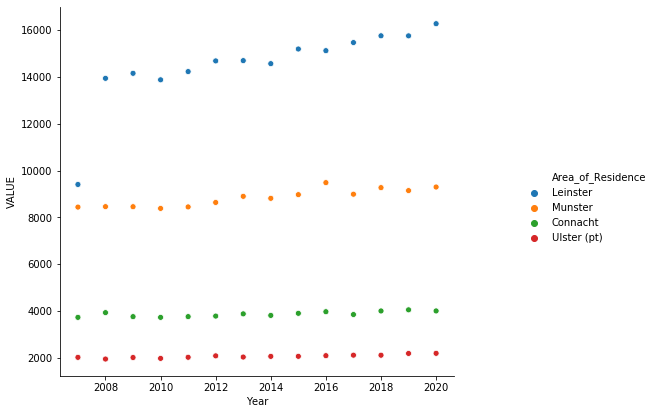

In [29]:
g = sns.relplot(
    data=dfProvinces, x="Year", y="VALUE", hue="Area_of_Residence",
    kind="scatter"
)
g.fig.set_figheight(6)
g.fig.set_figwidth(10)

In [32]:
dfProvinces.to_csv('Deaths_by_Region_provincelevel_aggregated.csv', index=False)